# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

absence = pd.read_csv("../data/absences.csv")

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

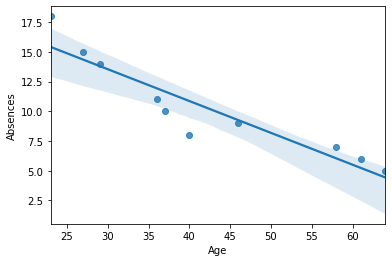

In [2]:
# your code here

sns.regplot(x = "Age", y = "Absences", data = absence)

In [3]:
# your comments here:
"The absences ratio is higher for younger people"

'The absences ratio is higher for younger people'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [4]:
# your code here
def slo_inter (var1, var2):

    numerator = 0 
    denominator = 0 

    for i in range(len(var1)):
        numerator += (list(var1)[i]-var1.mean()) * (list(var2)[i]-var2.mean())
        denominator += (var1[i]-var1.mean())**2


    slope = numerator/denominator 
    intercept = var2.mean() - slope * var1.mean()
    return slope , intercept


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [5]:
# your code here
slo_inter(absence.Age,absence.Absences)

(-0.2681088337033404, 21.58738189891063)

In [6]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [7]:
# your code here
def covar_corr(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    xi_x = np.array([ix - x_mean for ix in x])
    yi_y = np.array([iy - y_mean for iy in y])
    n = len(x)
    correlation = np.sum(xi_x * yi_y) / np.sqrt(np.sum(xi_x**2)*np.sum(yi_y**2))
    covariance = np.sum(xi_x * yi_y) / (n - 1)
    
    return  covariance, correlation

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [58]:
# your code here
cov , corr = covar_corr (absence.Age, absence.Absences)
print (corr)
print (cov)

-0.9325434092481012
-57.699999999999996


In [38]:
# your comments here
"they have a negative correlation "

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [8]:
# your comments here
"Yes when age increases absence decreases"

'Yes when age increases absence decreases'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [9]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [10]:
# your code here
cov , corr = covar_corr (ironbeers_df['X'], ironbeers_df.Y)

12.0

In [11]:
# your comments here
"There's a positive correlation between x and y"

'The more i tell people to stay the more they attend to ironbeers'

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

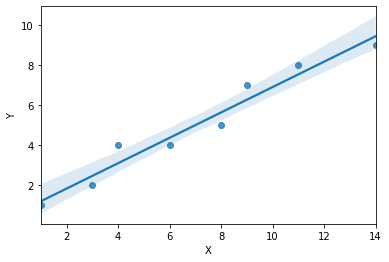

In [12]:
# your code here
sns.regplot(x = 'X', y = 'Y', data = ironbeers_df)

In [13]:
# your comments here
"the more people i tell to stay the more people will stay, it follows a positive correlation"

'the more people i tell to stay the more people will stay, it follows a very good correlation'

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [64]:
# your code here
# Manual way: 
slope , intercept = slo_inter(ironbeers_df["X"], ironbeers_df["Y"])

In [19]:
predicted_y = np.array([intercept + slope * x for x in list(ironbeers_df["X"])])

In [60]:
mean_errors = ironbeers_df["Y"]-ironbeers_df["Y"].mean()


In [59]:
SST = np.sum(mean_errors**2)
SSR = np.sum((predicted_y-ironbeers_df["Y"].mean())**2)


53.45454545454547

In [43]:
r_value = SSR / SST 

0.9545454545454543

In [30]:
import scipy.stats as stats
from sklearn import linear_model

In [31]:
# using module functions :
slope, intercept, r_value, p_value, std_err = stats.linregress(x = ironbeers_df.X , y = ironbeers_df.Y)

In [66]:
r_value**2

0.9545454545454545

In [46]:
lin_reg = linear_model.LinearRegression()

In [47]:
lin_reg.fit(X = pd.DataFrame(ironbeers_df["X"]) , y = ironbeers_df["Y"])

LinearRegression()

In [68]:
predicted_y = lin_reg.predict(pd.DataFrame(ironbeers_df["X"]))
predicted_y

array([1.18181818, 2.45454545, 3.09090909, 4.36363636, 5.63636364,
       6.27272727, 7.54545455, 9.45454545])

In [51]:
# your comments here

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here